In [1]:
import os
%pwd

'c:\\Users\\hp\\Documents\\DS\\Complete Project\\04-Mobile-Price-Predictor\\research'

In [2]:
os.chdir("../")
%pwd

'c:\\Users\\hp\\Documents\\DS\\Complete Project\\04-Mobile-Price-Predictor'

In [3]:
import pandas as pd
import numpy as np

# Pandas Profiling
from ydata_profiling import ProfileReport

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#color pallet and theme
import matplotlib.colors

colors = ["#e9f5f0","#d5eae9","#2e5551",'#468e71','#4d9b68','#59ae8c']
colors2 = ["#2e5551",'#468e71','#4d9b68','#59ae8c', "#e9f5f0","#d5eae9"]
cmap = matplotlib.colors.ListedColormap(colors2)

In [4]:
Df = pd.read_csv('artifacts/data_ingestion/Mobile-data-train.csv')
Df.sample(10)

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
678            1793     0          1.8         1  10       0          12   
1143            904     1          1.2         1  10       1          31   
820            1387     0          0.5         0   0       1          61   
1826            925     1          2.1         0   9       0          56   
275            1220     0          2.9         0   3       0          62   
273            1611     1          0.5         1  11       0           3   
1311            643     1          0.7         1   3       1          23   
471            1948     0          2.8         1   8       0          16   
1188            732     1          2.3         1   7       1          39   
756             545     0          0.5         0   0       1          11   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
678     0.5        169        6  ...       1086      1418  3533    16    14   
1143    0.8        112        3  ...        657      1014  2814    13     3   
820     0.5         98        3  ...        785      1151   629     5     3   
1826    0.2        196        1  ...       1262      1520  2466     8     0   
275     0.5        125        4  ...        403      1933  2589    19    11   
273     0.6         98        3  ...        303       714  1595     8     4   
1311    0.8        156        1  ...        314      1400  2096    13     6   
471     0.1        100        5  ...        631      1940  3630     9     7   
1188    0.6        188        7  ...       1163      1554  3681    19     3   
756     0.3        131        3  ...        381      1452   616    15     6   

      talk_time  three_g  touch_screen  wifi  price_range  
678          15        1             1     1            3  
1143         19        1             0     0            2  
820          11        1             1     0            0  
1826          5        1             0     0            2  
275          15        1             1     1            2  
273           9        1             0     1            1  
1311          2        1             0     0            1  
471          17        0             1     0            3  
1188         15        1             1     1            3  
756          19        1             1     1            0  

[10 rows x 21 columns]

In [5]:
# View dimensions of dataset   
rows, col = Df.shape
print ("Dimensions of dataset: {}" . format (Df.shape))
print ('Rows:', rows, '\nColumns:', col)

Dimensions of dataset: (2000, 21)
Rows: 2000 
Columns: 21


In [6]:
# Statistical details
Df.iloc[:, :-1].describe().T.sort_values(by='std', ascending = False)\
                          .style.background_gradient(cmap="Greens")\
                          .bar(subset=["max"], color='#F8766D')\
                          .bar(subset=["mean"], color='#00BFC4')

In [7]:
# Information about the dataframe
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

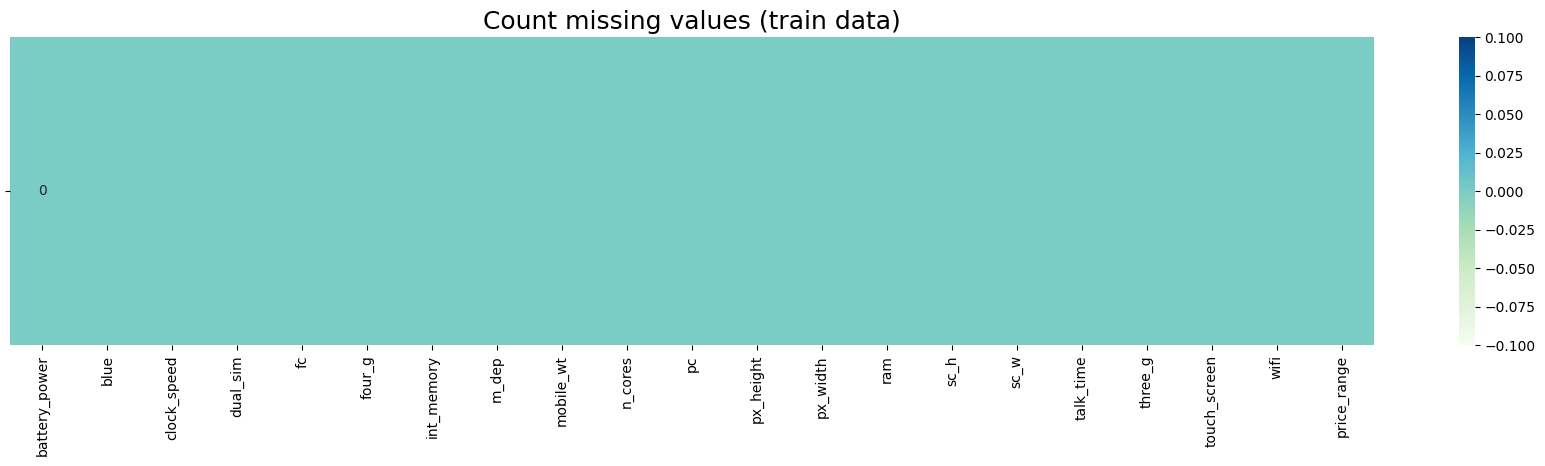

In [8]:
# Missing values 
plt.figure(figsize=(22,4))
sns.heatmap((Df.isna().sum()).to_frame(name='').T,cmap='GnBu', annot=True,
             fmt='0.0f').set_title('Count missing values (train data)', fontsize=18)
plt.show()

In [9]:
# Duplicated data 
Df.duplicated().sum()

0

In [10]:
# Separate numerical and categorical features
num_cols = pd.DataFrame (Df, columns= ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time'])
cat_cols = pd.DataFrame (Df, columns= ['blue', 'dual_sim', 'four_g', 'n_cores', 'three_g', 'touch_screen', 'wifi'])

In [11]:
# Separate numerical and categorical features into different lists
numerical_columns = list(Df.loc[:,['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']])
categorical_columns = list(Df.loc[:,['blue', 'dual_sim', 'four_g', 'n_cores', 'three_g', 'touch_screen', 'wifi']])

# EDA

Total number of features except for the target: 20
Number of categorical (<25 Unique Values) features: 13
Number of continuous features: 7


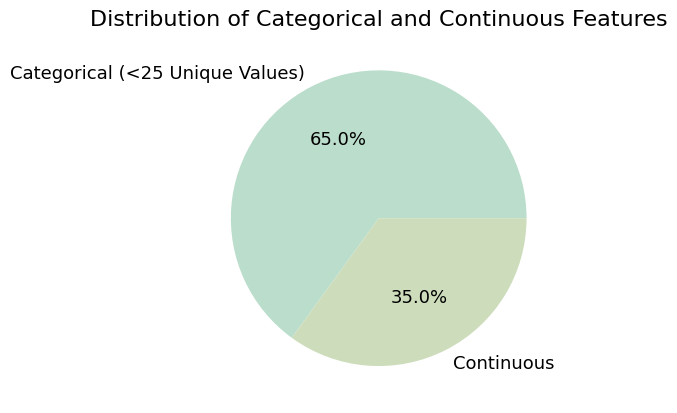

In [12]:
TARGET = 'price_range'
FEATURES = [col for col in Df.columns if col not in ['Df', TARGET]]

cat_features = [col for col in FEATURES if Df[col].nunique() < 25]
cont_features = [col for col in FEATURES if Df[col].nunique() >= 25]

num_cat_features = len(cat_features)
num_cont_features = len(cont_features)

print(f"Total number of features except for the target: {len(FEATURES)}")
print(f"\033[92mNumber of categorical (<25 Unique Values) features: {num_cat_features}")
print(f"\033[96mNumber of continuous features: {num_cont_features}")

# Define labels and colors for the pie chart
labels = ['Categorical (<25 Unique Values)', 'Continuous']
colors = ['#bbddcb', '#cdddbb']

plt.pie([num_cat_features, num_cont_features], 
        labels=labels,
        colors=colors,
        textprops={'fontsize': 13},
        autopct='%1.1f%%')

# Add a title to the plot
plt.title('Distribution of Categorical and Continuous Features', fontsize=16)

# Show the plot
plt.show()

In [13]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

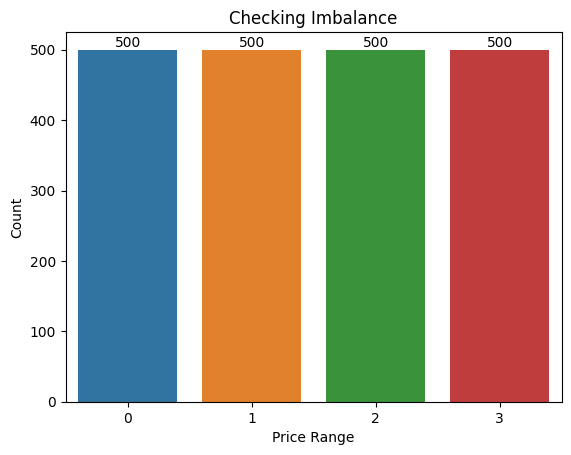

In [19]:
# Create a count plot of the 'price_range' column and label the bars with their counts
ax = sns.countplot(x='price_range',data = Df)
for container in ax.containers:
    ax.bar_label(container)

# Set the x-axis and y-axis labels
plt.xlabel("Price Range")
plt.ylabel("Count")

# Set the title of the plot
plt.title("Checking Imbalance")

# Show the plot
plt.show()

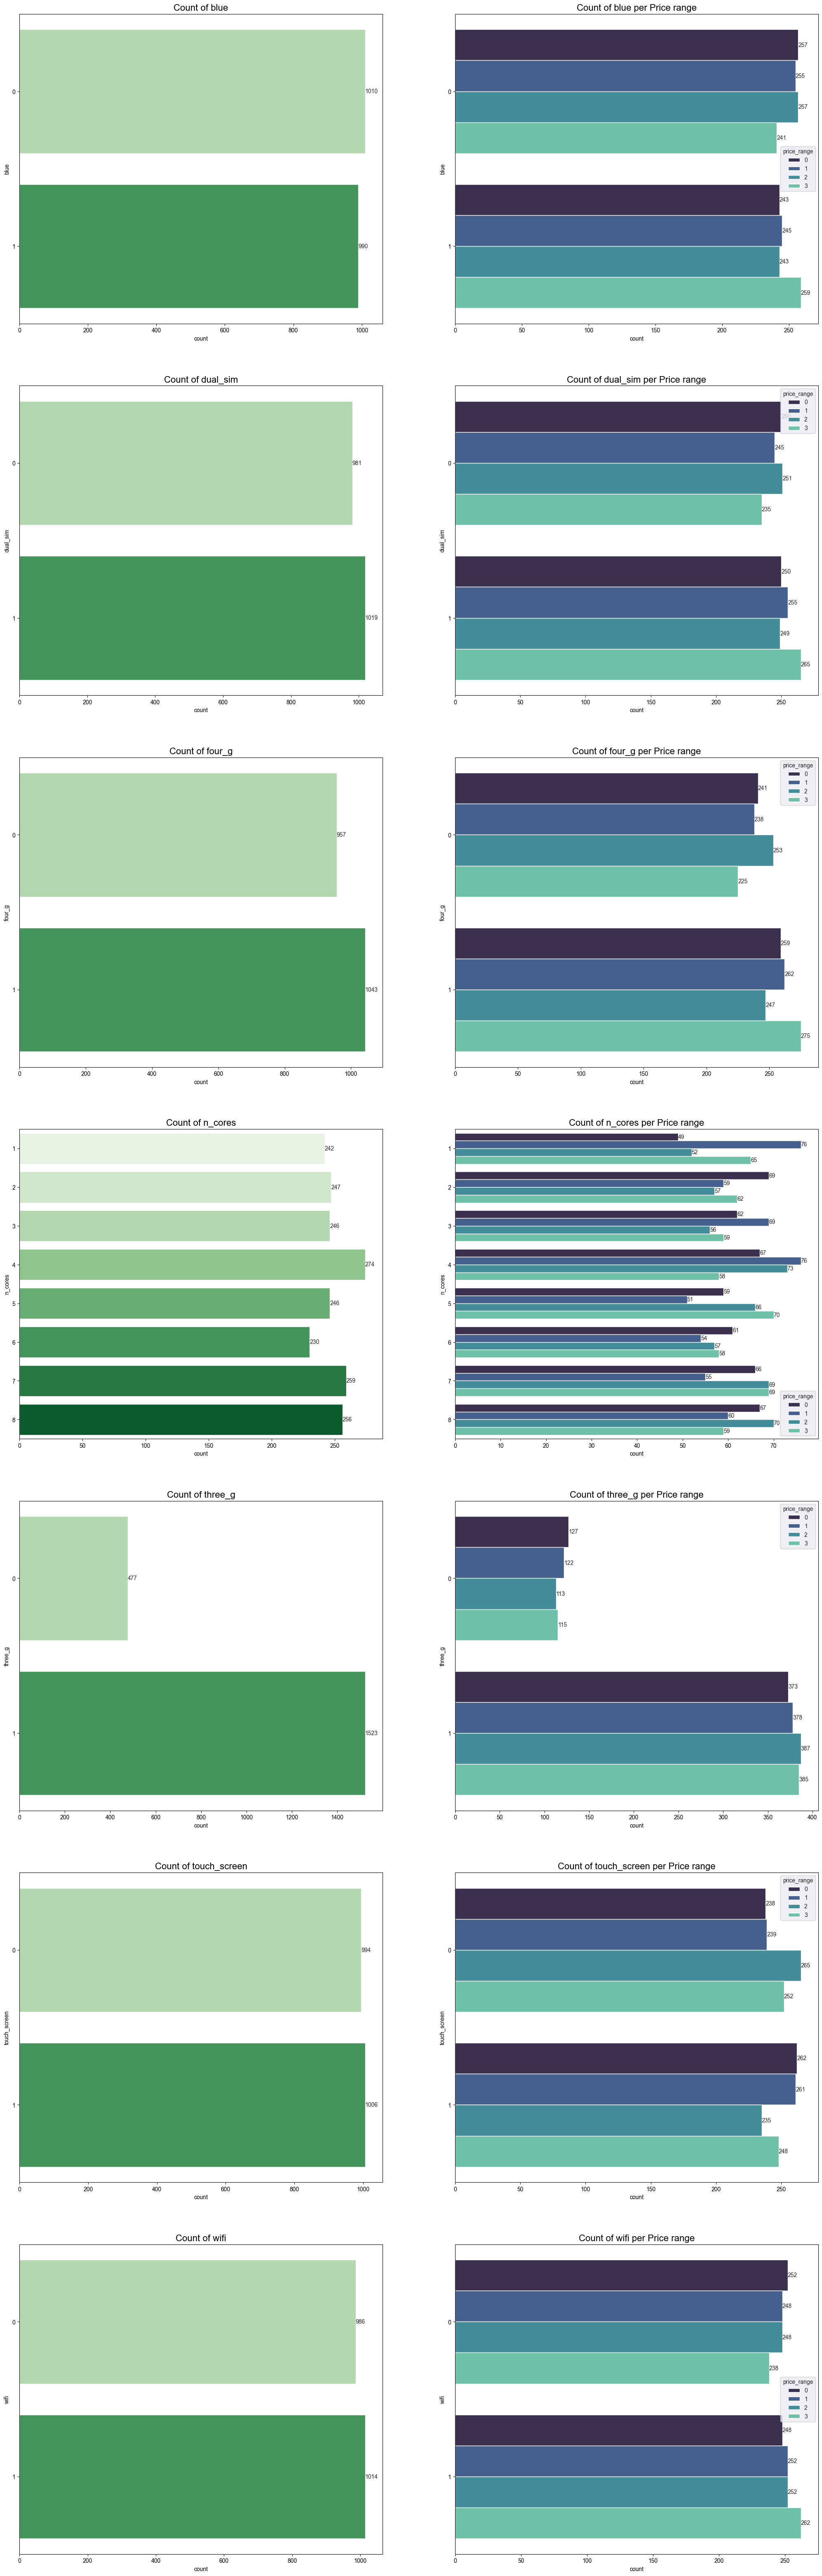

In [20]:
fig, axes = plt.subplots(7,2, figsize=(25,80))
sns.set_style('darkgrid')
idx = 0
for col in categorical_columns:
    sns.countplot(data=Df, y=col, palette='Greens', orient='h',
                  ax=axes[idx][0]).set_title(f'Count of {col}', fontsize='16')
    for container in axes[idx][0].containers:
        axes[idx][0].bar_label(container)
    sns.countplot(data=Df, y=col, palette='mako', orient='h',  hue='price_range',
                  ax=axes[idx][1]).set_title(f'Count of {col} per Price range', fontsize='16')
    for container in axes[idx][1].containers:
        axes[idx][1].bar_label(container)
    idx +=1
plt.show()

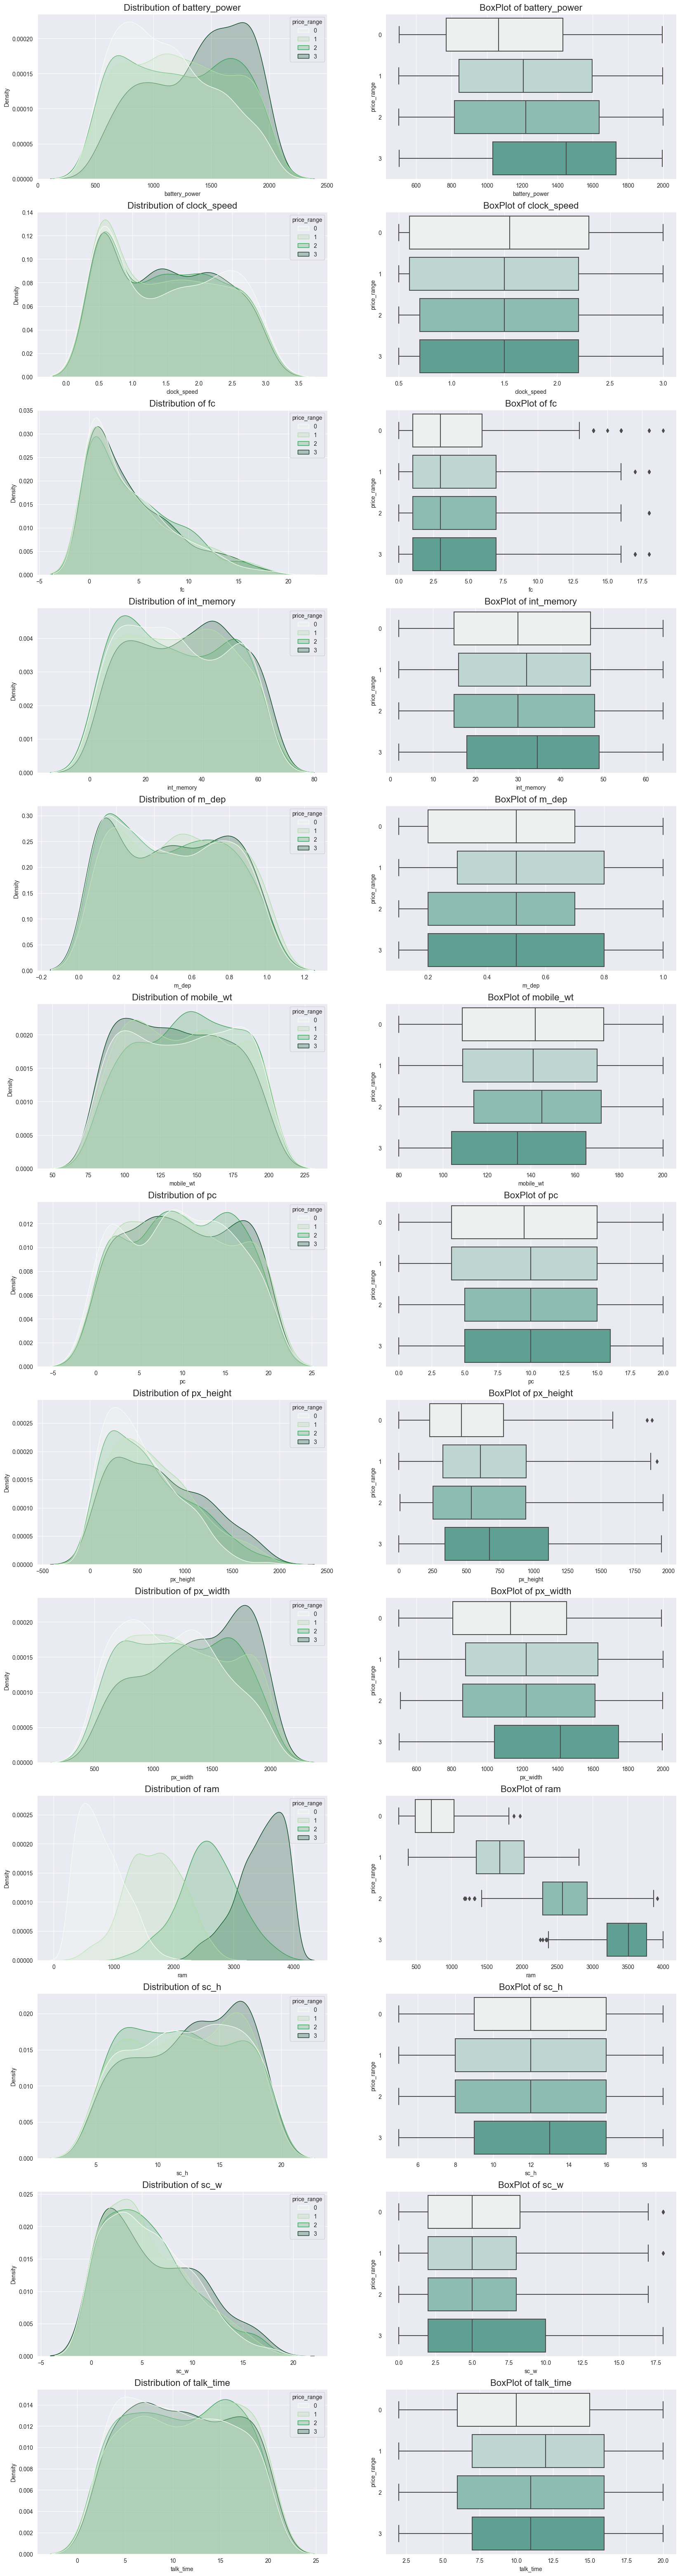

In [21]:
fig, axes = plt.subplots(13,2, figsize=(20,80))
sns.set_style('darkgrid')
idx = 0
for col in (numerical_columns):
    sns.kdeplot(data=Df, x=col, palette='Greens',fill=True , hue='price_range', 
                ax=axes[idx][0]).set_title(f'Distribution of {col}', fontsize='16')
    sns.boxplot(data=Df, x=col, palette='light:#5A9' , y='price_range', orient='h', 
                ax=axes[idx][1]).set_title(f'BoxPlot of {col}', fontsize='16')
    idx +=1
plt.show()

In [22]:
pr = Df.groupby(['price_range'])
target = pr.describe(percentiles = [0.25, 0.5, 0.75])[numerical_columns]
target.T.style.background_gradient(cmap='Greens')

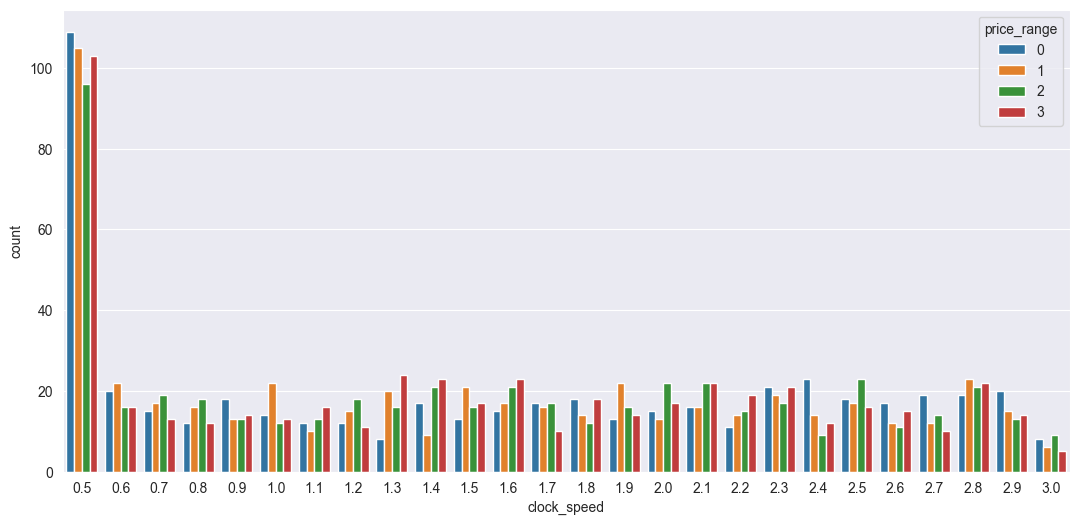

In [23]:
# clock_speed based on price_range
plt.figure(figsize = (13,6))
sns.countplot(x = Df['clock_speed'], hue ="price_range", data=Df) 
plt.show()

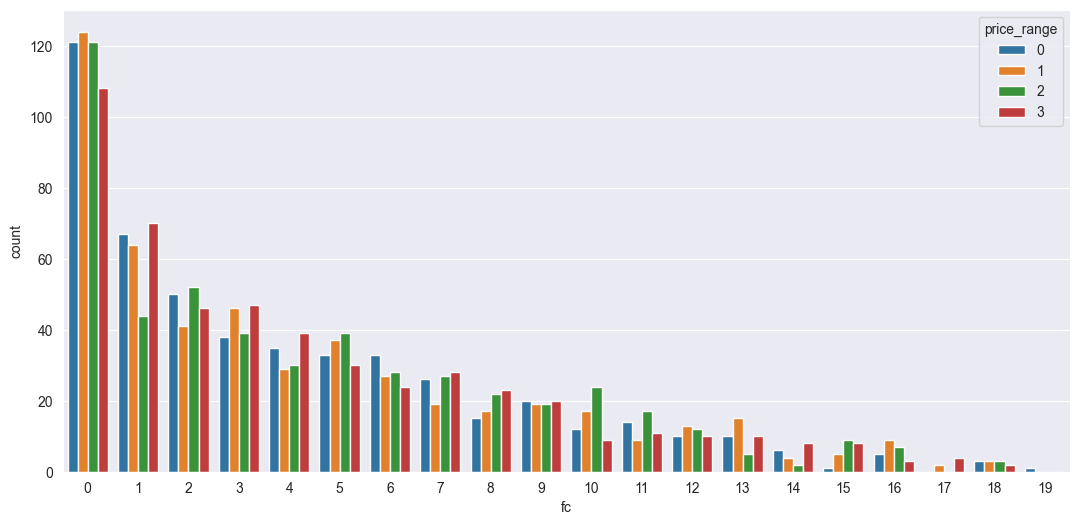

In [24]:
# fc based on price_range
plt.figure(figsize = (13,6))
sns.countplot(x = Df['fc'], hue ="price_range", data=Df) 
plt.show()

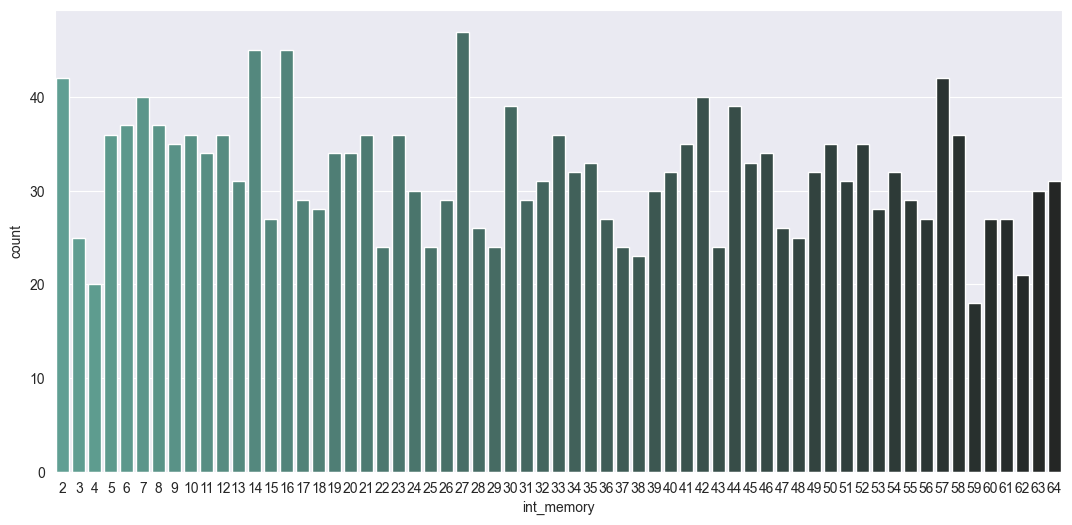

In [25]:
# count of int_memory
plt.figure(figsize = (13,6))
sns.countplot(x = Df['int_memory'], palette='dark:#5A9_r', data=Df) 
plt.show()

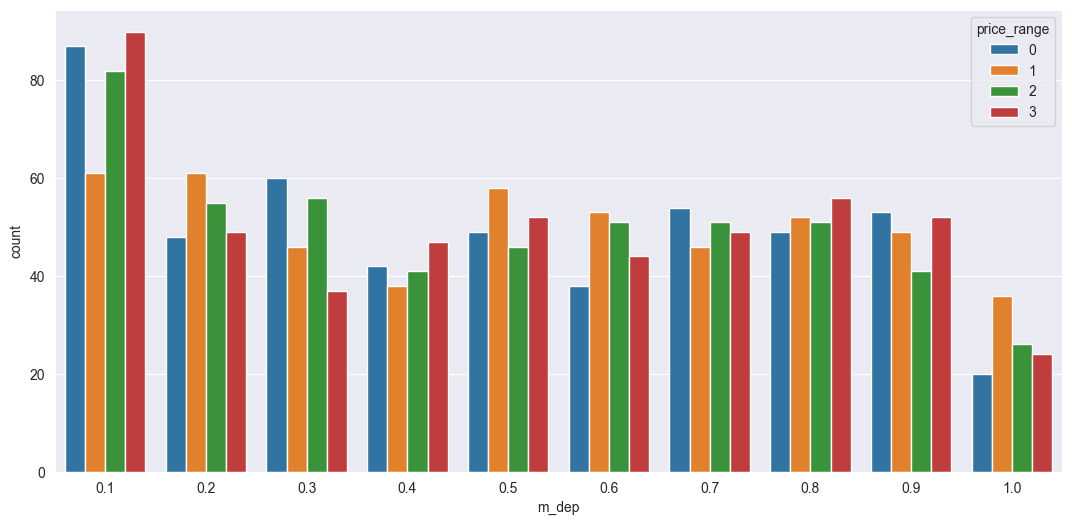

In [26]:
# m_dep based on price_range
plt.figure(figsize = (13,6))
sns.countplot(x = Df['m_dep'], hue ="price_range", data=Df) 
plt.show()

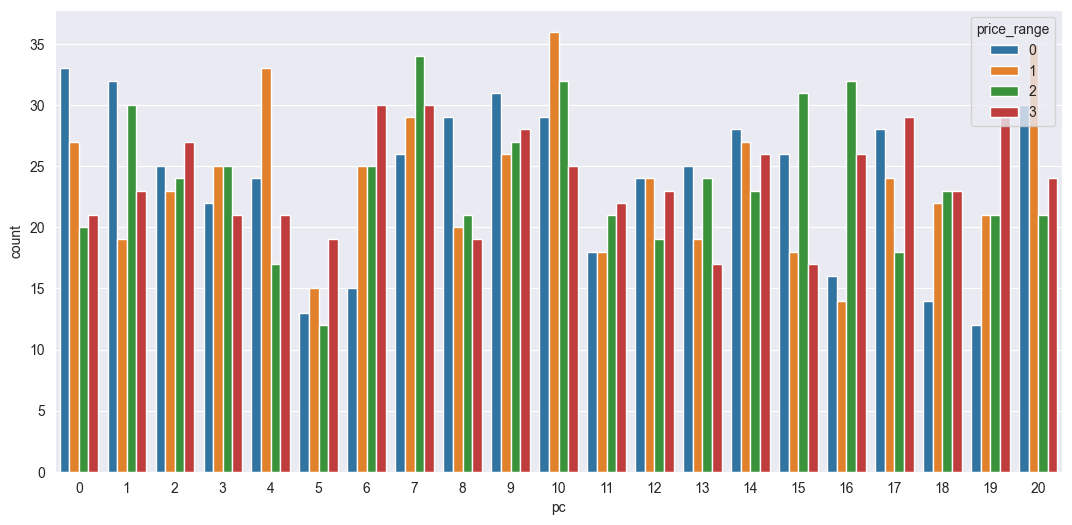

In [27]:
# pc based on price_range
plt.figure(figsize = (13,6))
sns.countplot(x = Df['pc'], hue ="price_range", data=Df) 
plt.show()

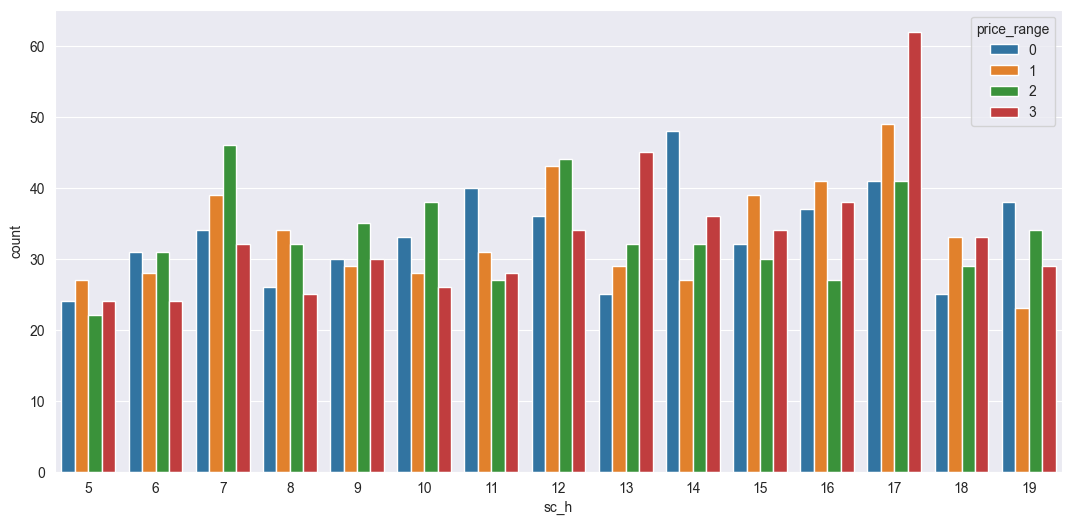

In [28]:
# sc_h based on price_range
plt.figure(figsize = (13,6))
sns.countplot(x = Df['sc_h'], hue ="price_range", data=Df) 
plt.show()

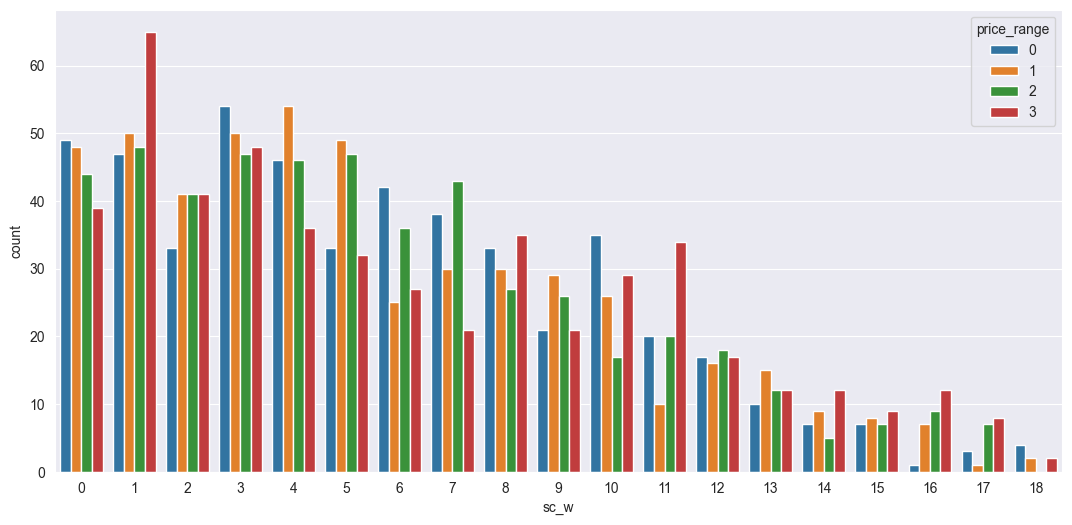

In [29]:
# sc_w based on price_range
plt.figure(figsize = (13,6))
sns.countplot(x = Df['sc_w'], hue ="price_range", data=Df) 
plt.show()

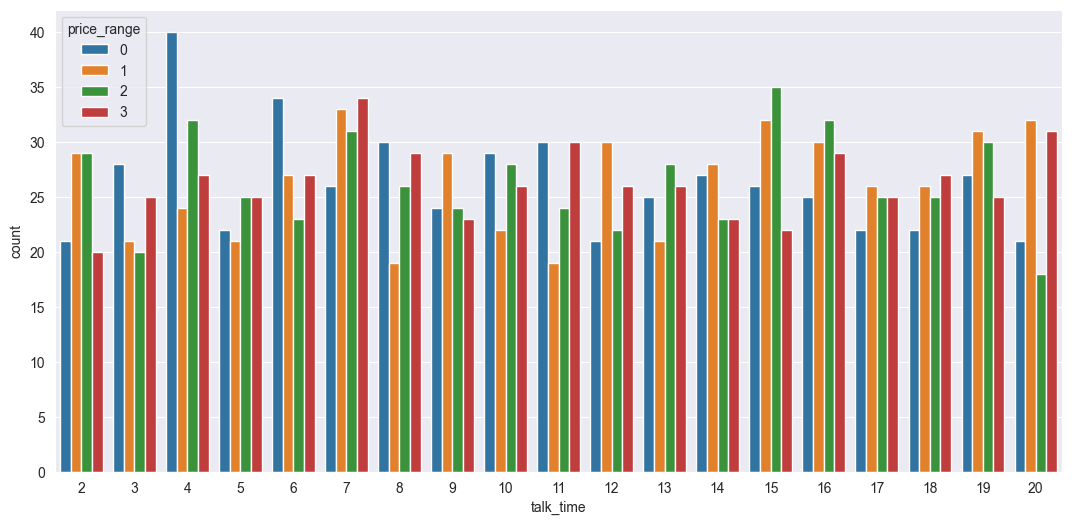

In [30]:
# talk_time based on price_range
plt.figure(figsize = (13,6))
sns.countplot(x = Df['talk_time'], hue ="price_range", data=Df) 
plt.show()

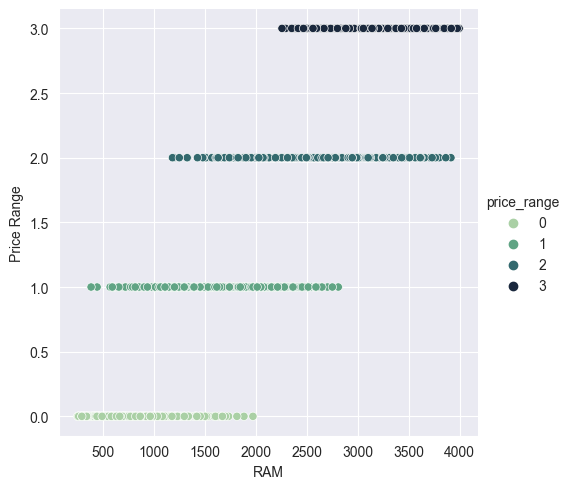

In [31]:
# Create scatter plot
sns.relplot(data=Df, x="ram", y="price_range", hue="price_range", palette="ch:r=-.5, l=.75")

# Add axis labels
plt.xlabel("RAM", fontsize=10)
plt.ylabel("Price Range", fontsize=10)

# Show the plot
plt.show()

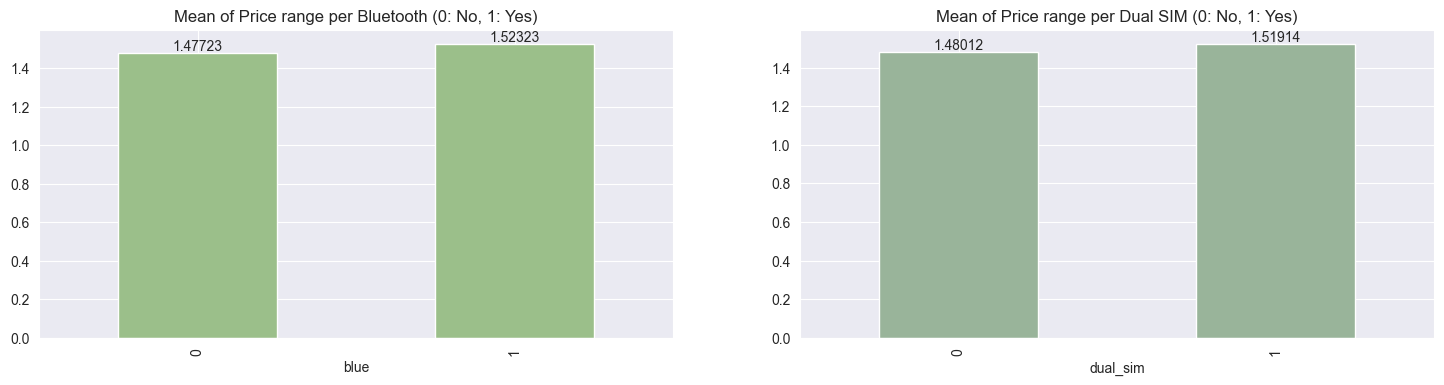

In [32]:
f,ax=plt.subplots(1,2,figsize=(18, 4))

ax1= Df[['price_range','blue']].groupby(['blue']).mean().plot.bar(color='#9bbf8a',ax=ax[0])
for container in ax1.containers:
    ax1.bar_label(container)
ax[0].set_title('Mean of Price range per Bluetooth (0: No, 1: Yes)')
ax1.legend().set_visible(False)

ax2= Df[['price_range','dual_sim']].groupby(['dual_sim']).mean().plot.bar(color='#99b49a',ax=ax[1])  
for container in ax2.containers:
    ax2.bar_label(container)
ax[1].set_title('Mean of Price range per Dual SIM (0: No, 1: Yes)')
ax2.legend().set_visible(False)

plt.show()

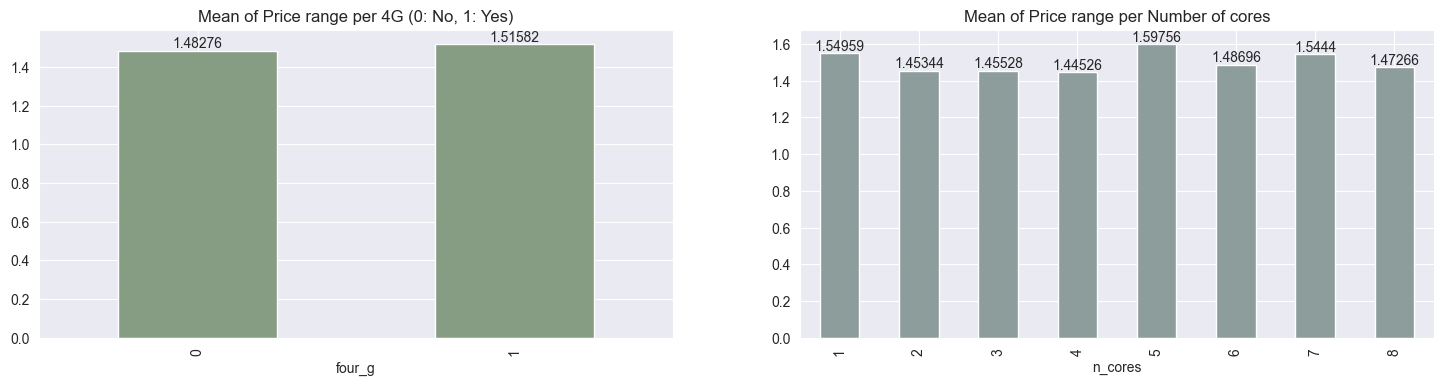

In [33]:
f,ax=plt.subplots(1,2,figsize=(18, 4))

ax1= Df[['price_range','four_g']].groupby(['four_g']).mean().plot.bar(color='#869d84',ax=ax[0])
for container in ax1.containers:
    ax1.bar_label(container)
ax[0].set_title('Mean of Price range per 4G (0: No, 1: Yes)')
ax1.legend().set_visible(False)

ax2= Df[['price_range','n_cores']].groupby(['n_cores']).mean().plot.bar(color='#8d9d9b',ax=ax[1])  
for container in ax2.containers:
    ax2.bar_label(container)
ax[1].set_title('Mean of Price range per Number of cores')
ax2.legend().set_visible(False)

plt.show()

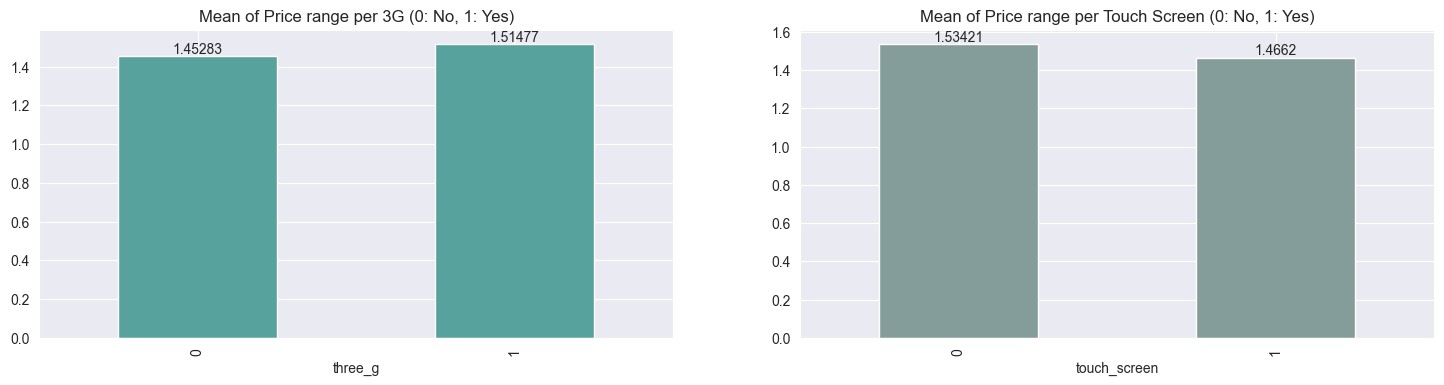

In [34]:
f,ax=plt.subplots(1,2,figsize=(18, 4))

ax1= Df[['price_range','three_g']].groupby(['three_g']).mean().plot.bar(color='#58a29d',ax=ax[0])
for container in ax1.containers:
    ax1.bar_label(container)
ax[0].set_title('Mean of Price range per 3G (0: No, 1: Yes)')
ax1.legend().set_visible(False)

ax2= Df[['price_range','touch_screen']].groupby(['touch_screen']).mean().plot.bar(color='#849d9b',ax=ax[1])  
for container in ax2.containers:
    ax2.bar_label(container)
ax[1].set_title('Mean of Price range per Touch Screen (0: No, 1: Yes)')
ax2.legend().set_visible(False)

plt.show()

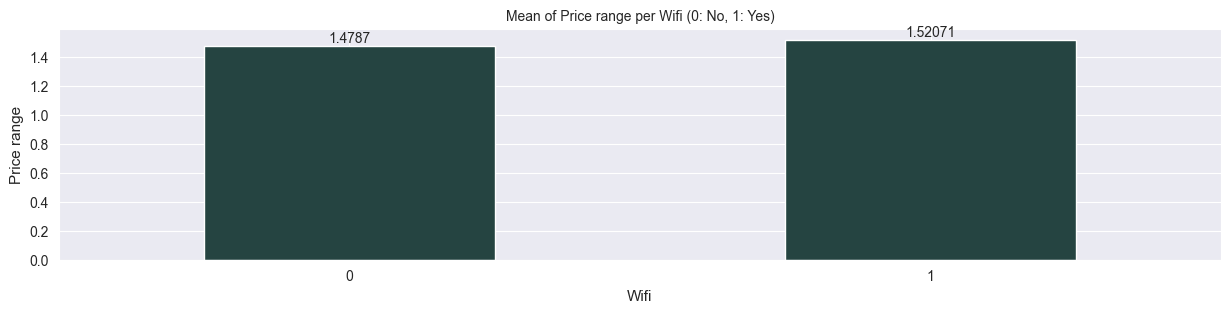

In [35]:
plt.figure(figsize = (15, 3))
a=Df.groupby('wifi')['price_range'].mean()
ax = a.plot.bar(color="#254441", width=.5)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Mean of Price range per Wifi (0: No, 1: Yes)', size=10)
plt.ylabel('Price range', size=11)
plt.xlabel('Wifi', size=11)
plt.xticks(rotation=0)
plt.legend().set_visible(False)
plt.show()

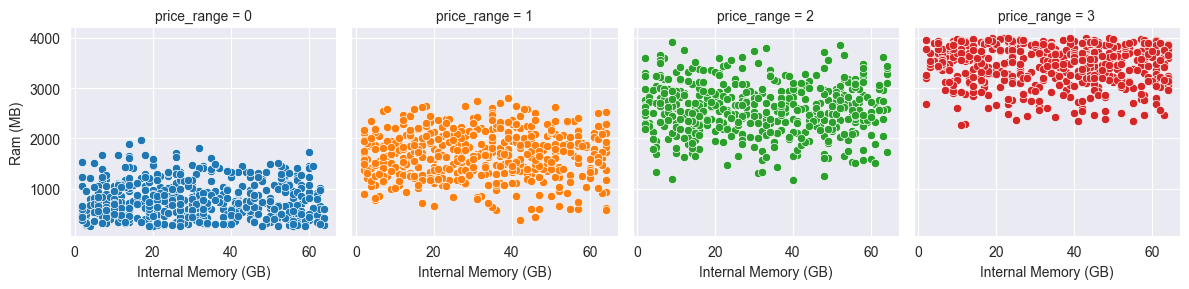

In [36]:
g = sns.FacetGrid(Df, col="price_range", hue="price_range")
g.map(sns.scatterplot, "int_memory", "ram")
g.set_axis_labels("Internal Memory (GB)", "Ram (MB)")
plt.show()


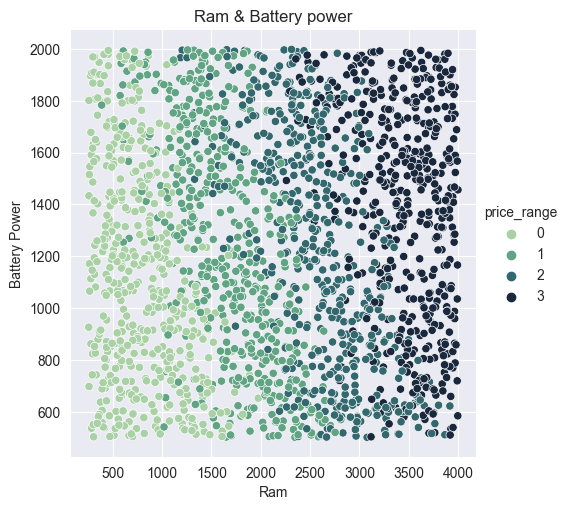

In [37]:
sns.relplot(data=Df, x="ram", y="battery_power", hue="price_range", palette="ch:r=-.5,l=.75")
plt.xlabel('Ram')
plt.ylabel('Battery Power')
plt.title('Ram & Battery power')
plt.show()

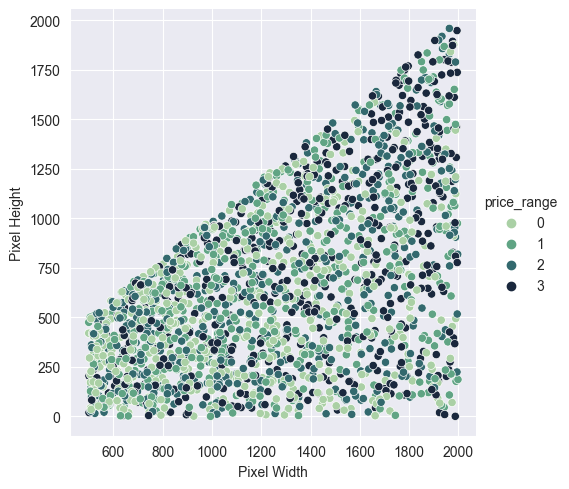

In [38]:
sns.relplot(data=Df, x="px_width", y="px_height", hue="price_range", palette="ch:r=-.5,l=.75")
plt.xlabel('Pixel Width')
plt.ylabel('Pixel Height')
plt.show()

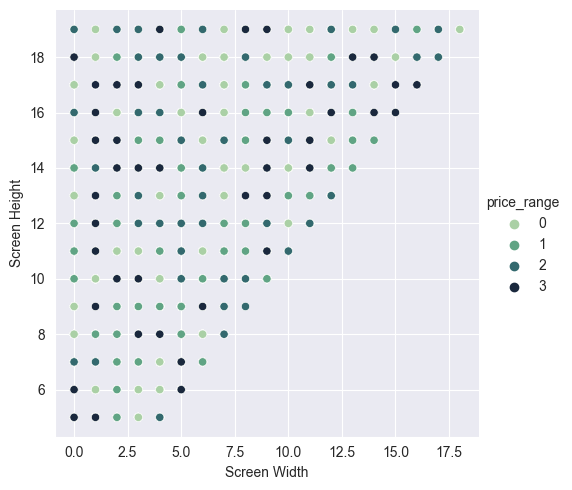

In [39]:
sns.relplot(data=Df, x="sc_w", y="sc_h", hue="price_range", palette="ch:r=-.5,l=.75")
plt.xlabel('Screen Width')
plt.ylabel('Screen Height')
plt.show()

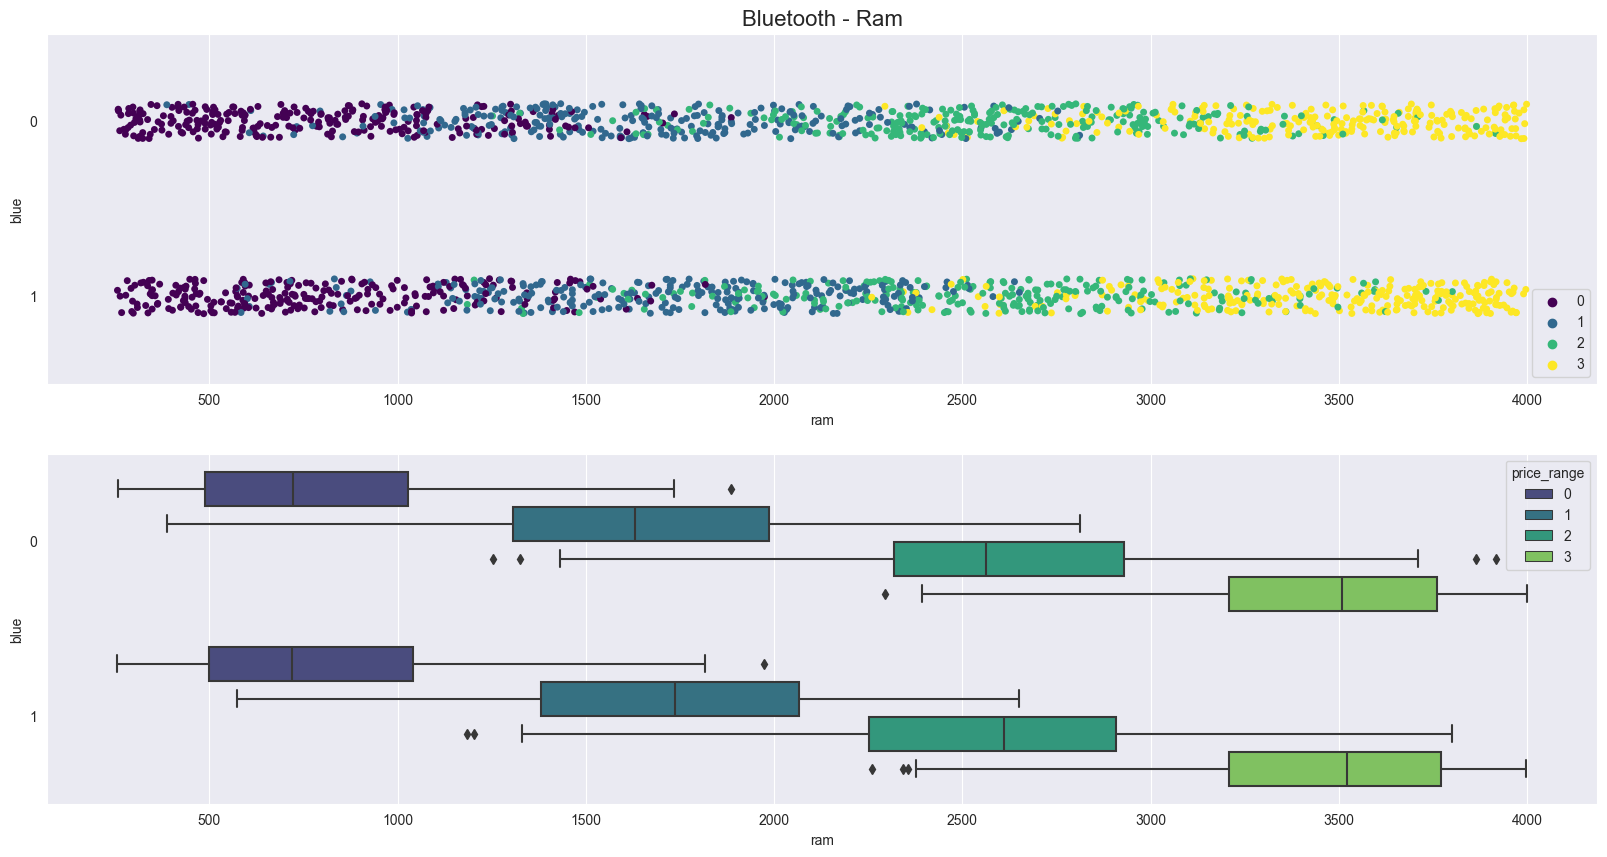

In [40]:
fig, axes = plt.subplots(2,1, figsize=(20,10))
sns.stripplot(data=Df, x='ram', palette='viridis', hue='price_range', y='blue', orient='h', ax=axes[0])
axes[0].set_title('Bluetooth - Ram', fontsize='16')
axes[0].legend(loc=4)
sns.boxplot(data=Df, x='ram', palette='viridis', hue='price_range', y='blue', orient='h', ax=axes[1])
plt.show()

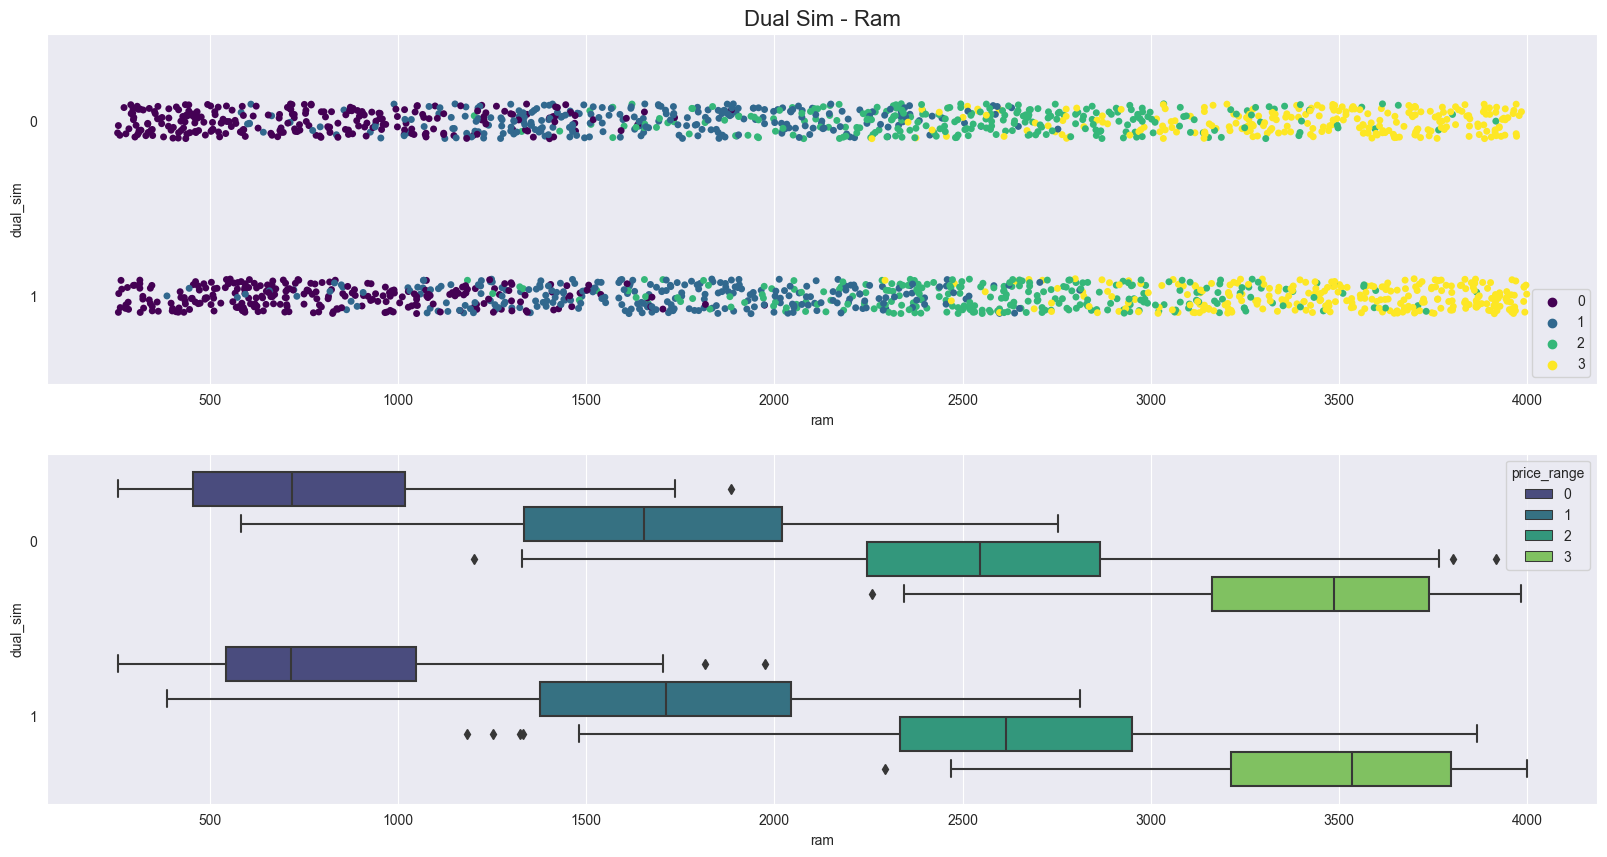

In [41]:
fig, axes = plt.subplots(2,1, figsize=(20,10))
sns.stripplot(data=Df, x='ram', palette='viridis', hue='price_range', y='dual_sim', orient='h', ax=axes[0])
axes[0].set_title('Dual Sim - Ram', fontsize='16')
axes[0].legend(loc=4)
sns.boxplot(data=Df, x='ram', palette='viridis', hue='price_range', y='dual_sim', orient='h', ax=axes[1])
plt.show()

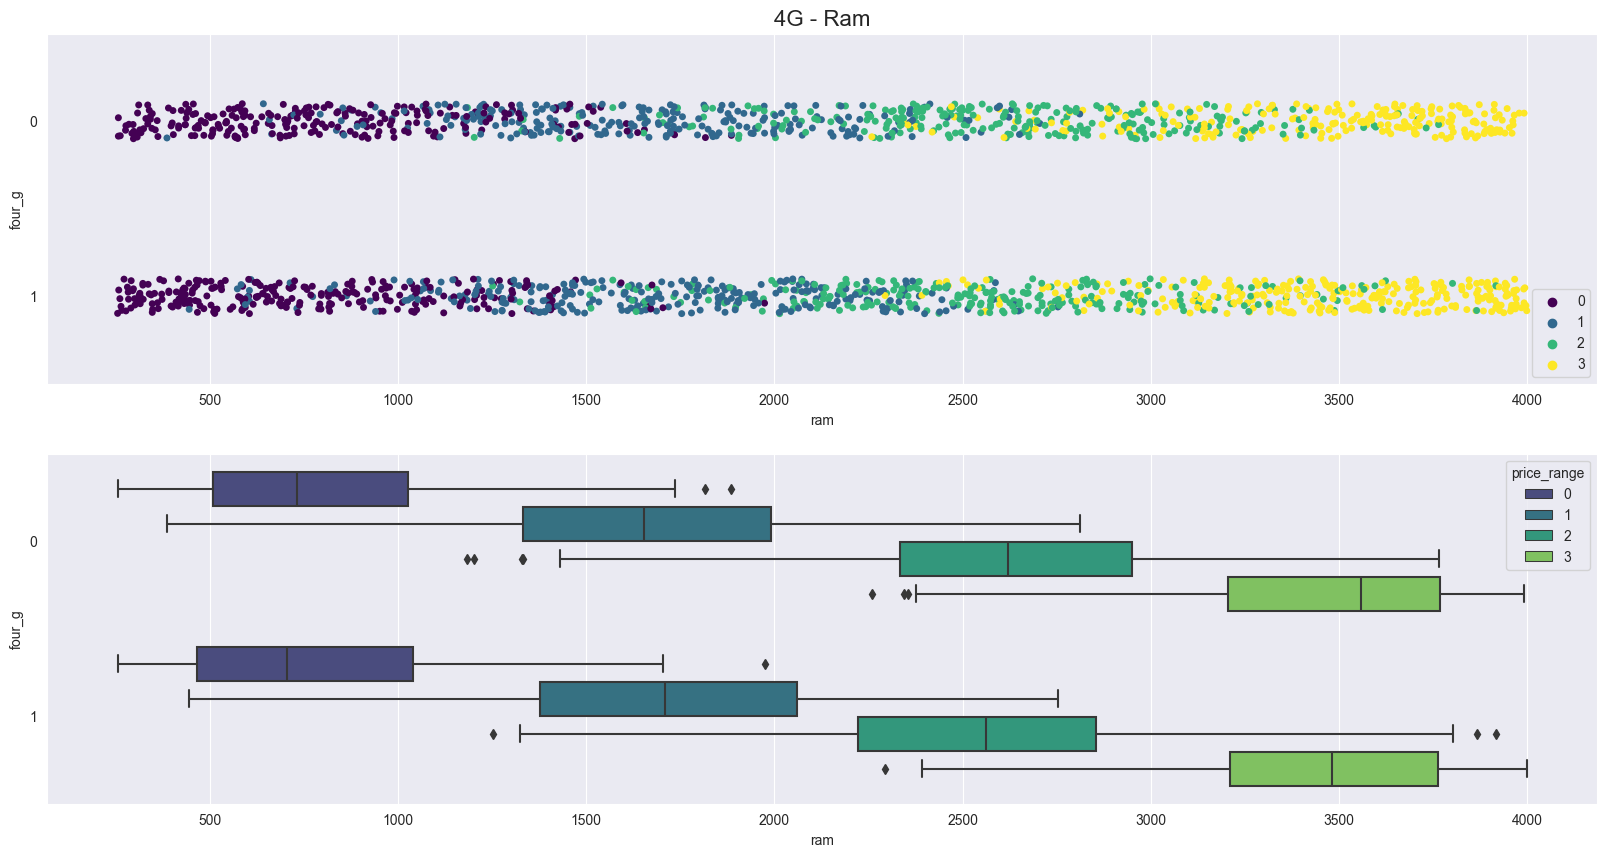

In [42]:
fig, axes = plt.subplots(2,1, figsize=(20,10))
sns.stripplot(data=Df, x='ram', palette='viridis', hue='price_range', y='four_g', orient='h', ax=axes[0])
axes[0].set_title('4G - Ram', fontsize='16')
axes[0].legend(loc=4)
sns.boxplot(data=Df, x='ram', palette='viridis', hue='price_range', y='four_g', orient='h', ax=axes[1])
plt.show()

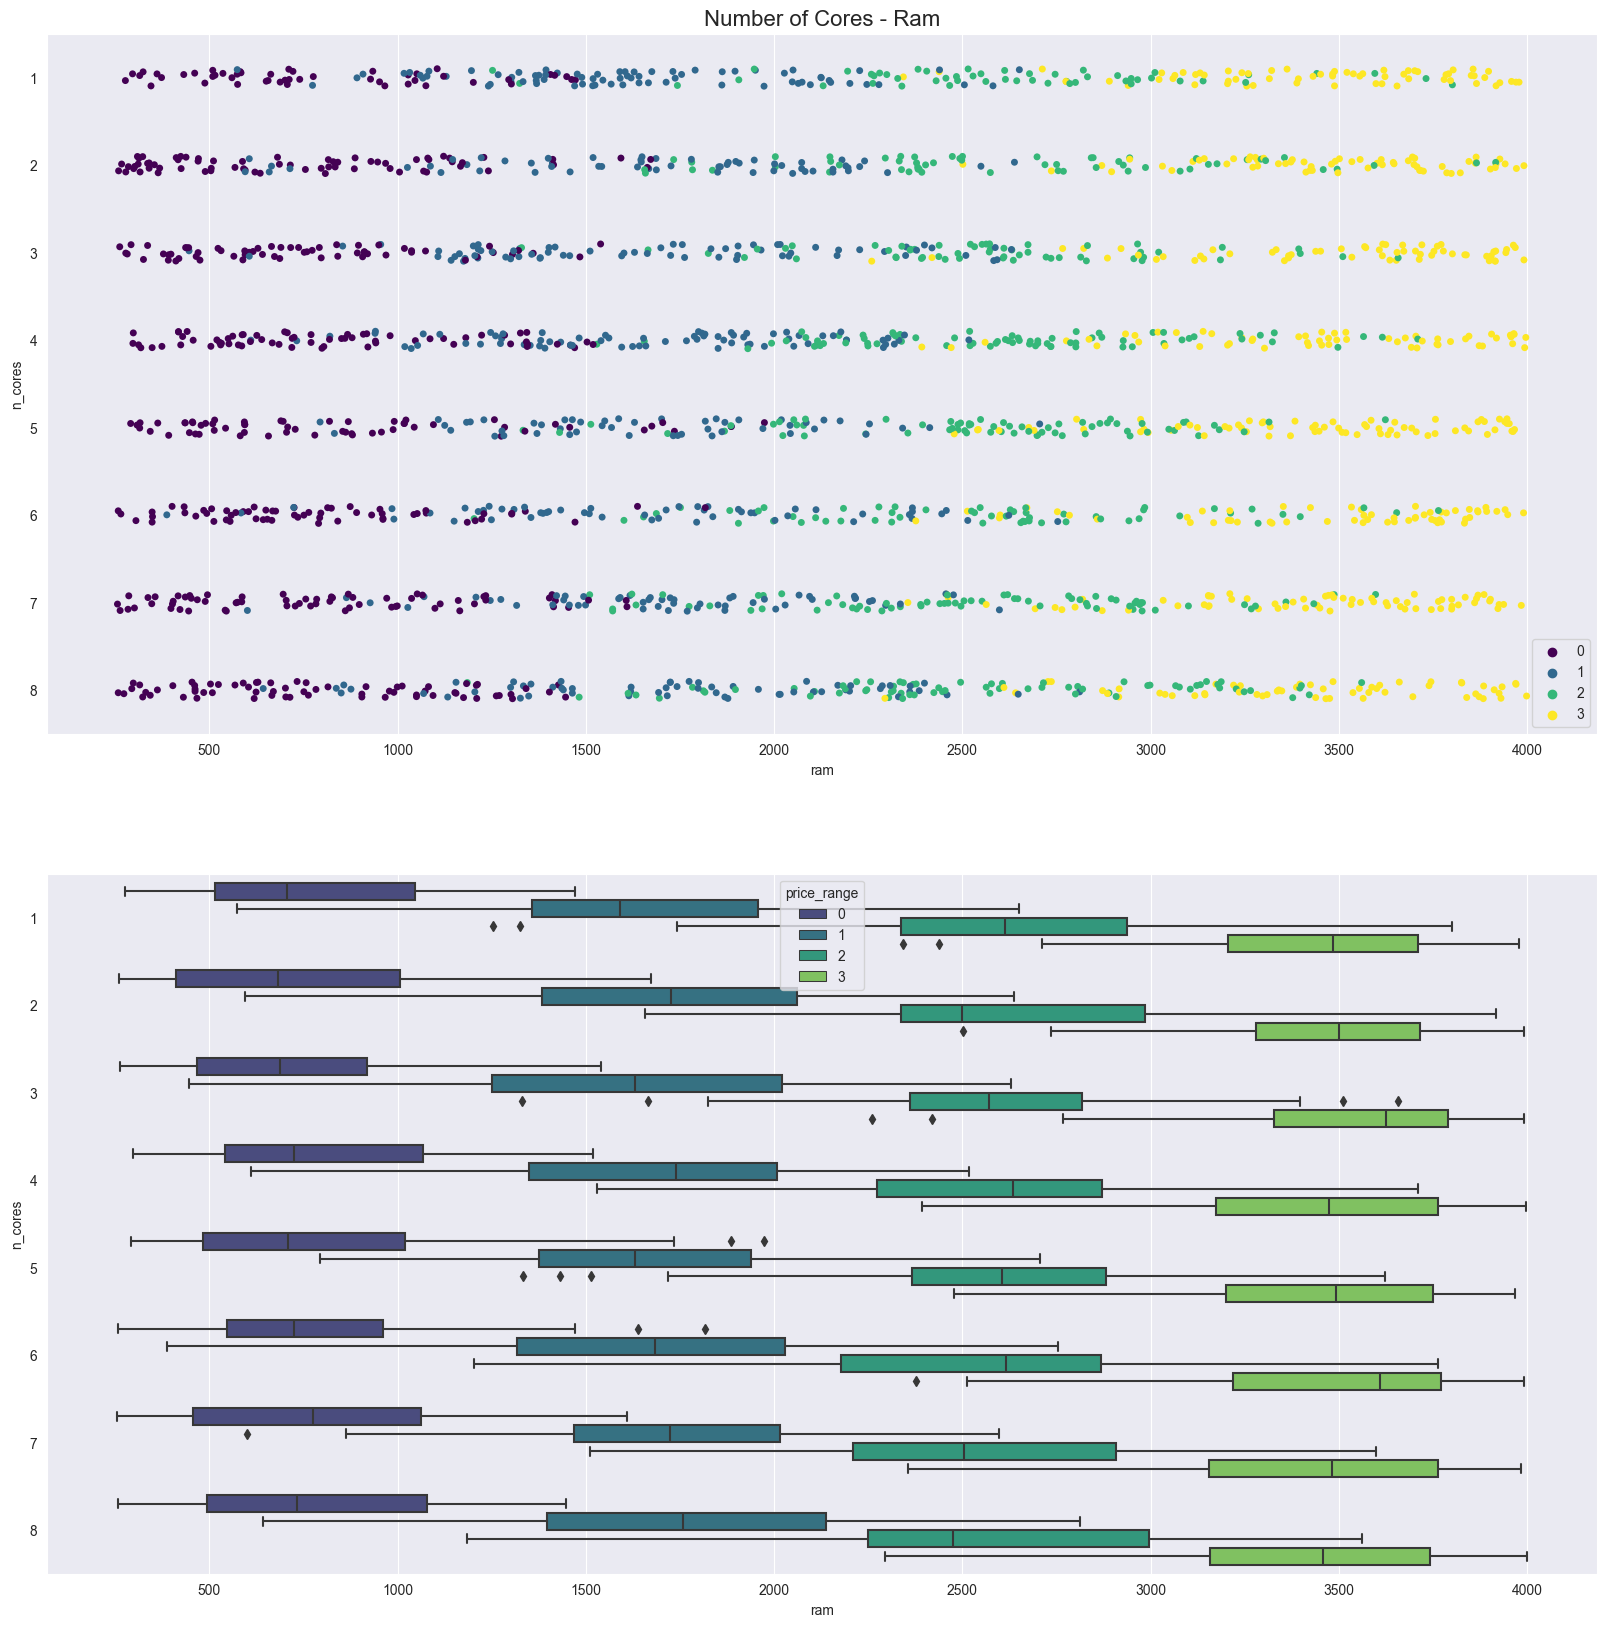

In [43]:
fig, axes = plt.subplots(2,1, figsize=(20,20))
sns.stripplot(data=Df, x='ram', palette='viridis', hue='price_range', y='n_cores', orient='h', ax=axes[0])
axes[0].set_title('Number of Cores - Ram', fontsize='16')
axes[0].legend(loc=4)
sns.boxplot(data=Df, x='ram', palette='viridis', hue='price_range', y='n_cores', orient='h', ax=axes[1])
plt.show()

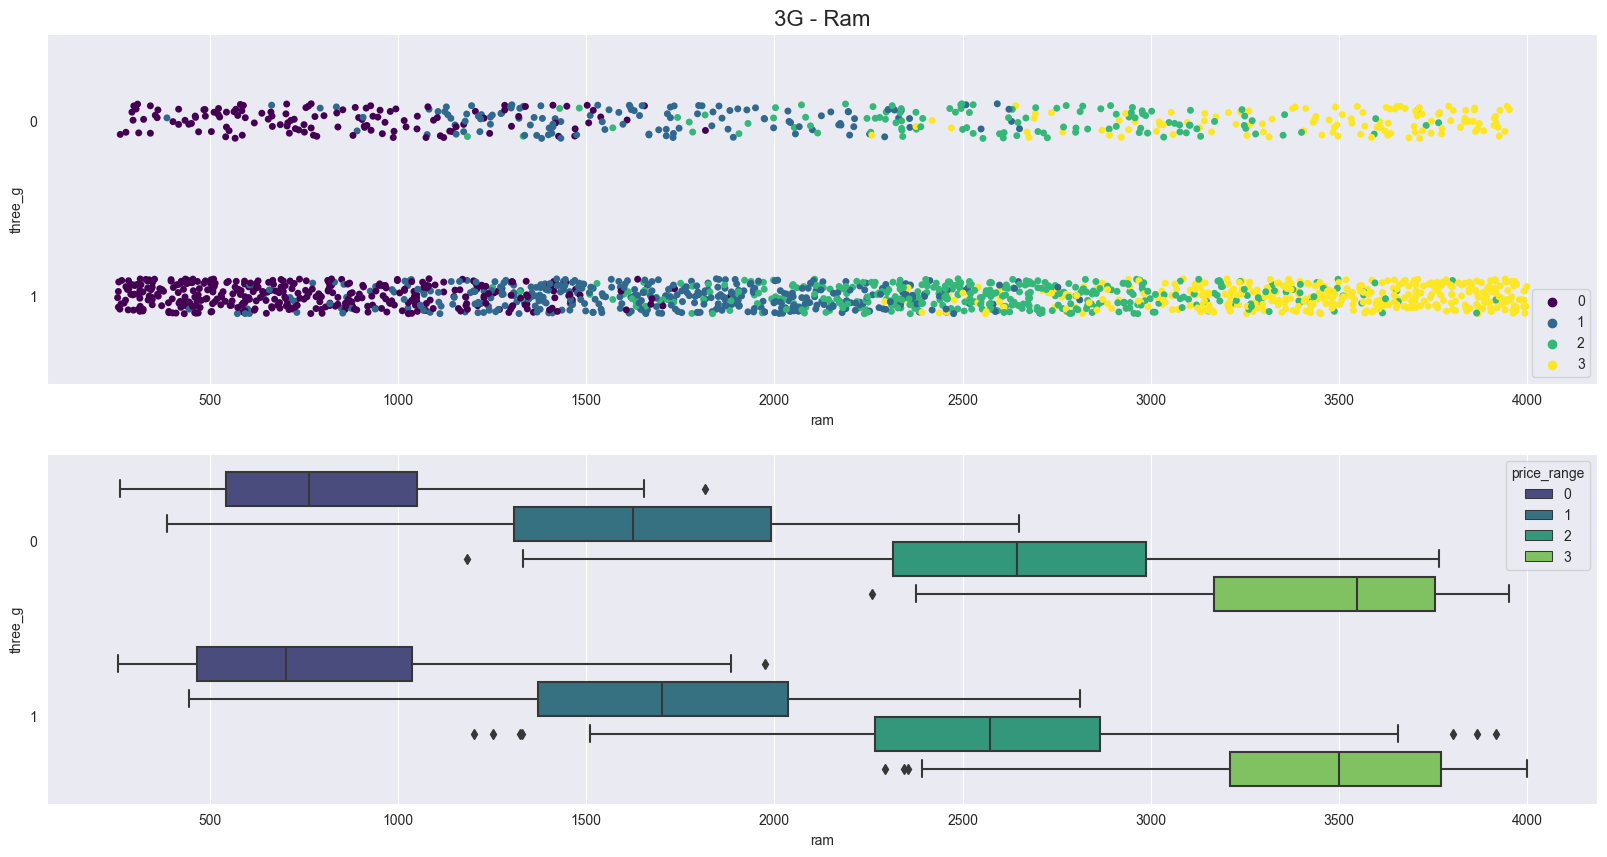

In [44]:
fig, axes = plt.subplots(2,1, figsize=(20,10))
sns.stripplot(data=Df, x='ram', palette='viridis', hue='price_range', y='three_g', orient='h', ax=axes[0])
axes[0].set_title('3G - Ram', fontsize='16')
axes[0].legend(loc=4)
sns.boxplot(data=Df, x='ram', palette='viridis', hue='price_range', y='three_g', orient='h', ax=axes[1])
plt.show()

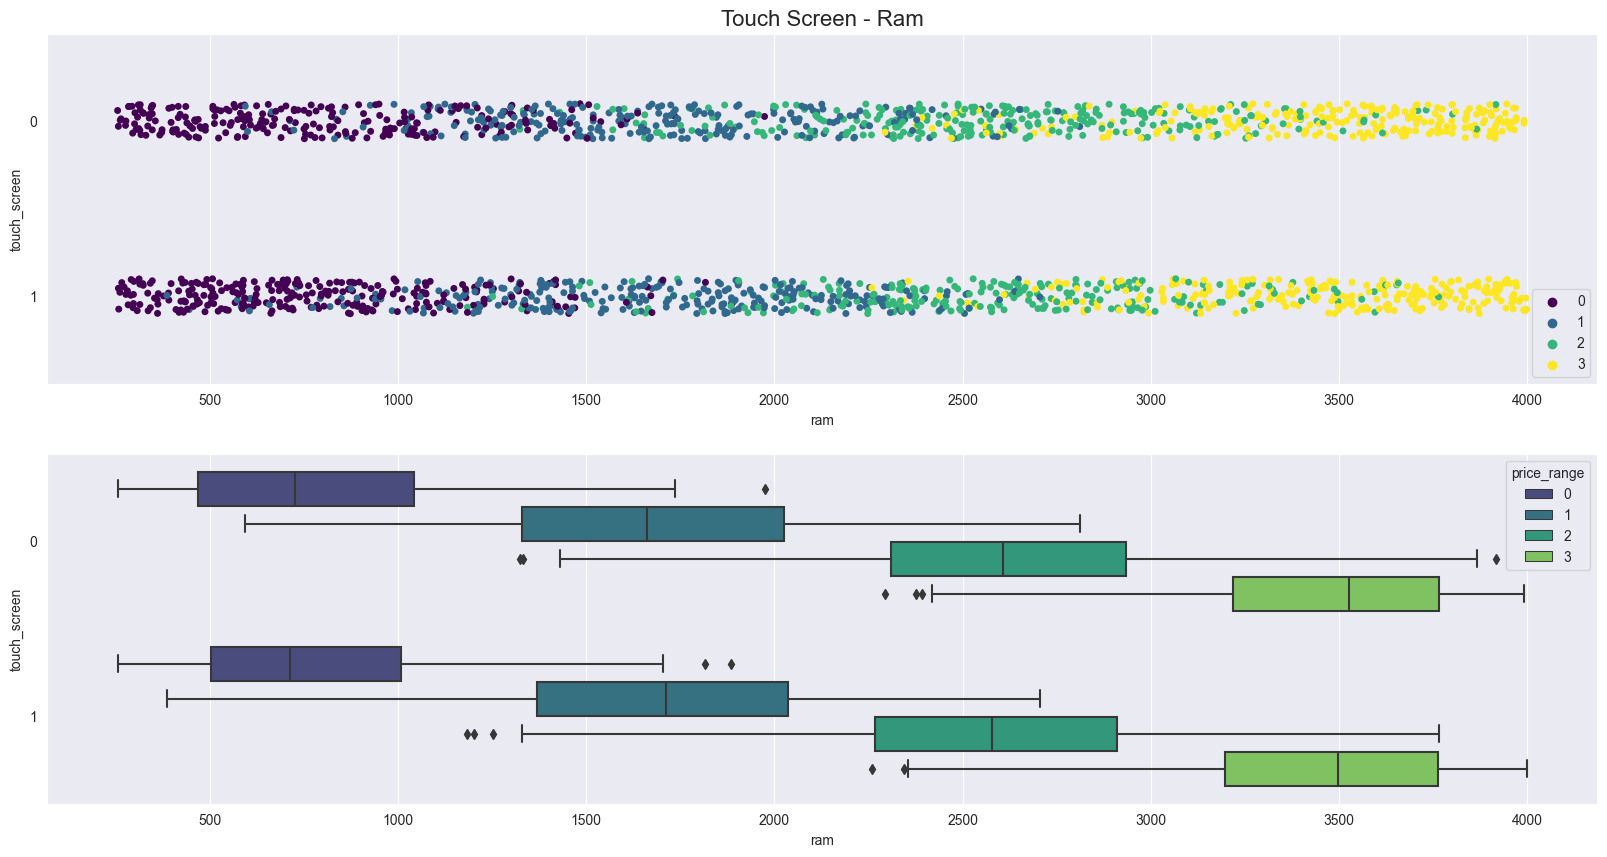

In [45]:
fig, axes = plt.subplots(2,1, figsize=(20,10))
sns.stripplot(data=Df, x='ram', palette='viridis', hue='price_range', y='touch_screen', orient='h', ax=axes[0])
axes[0].set_title('Touch Screen - Ram', fontsize='16')
axes[0].legend(loc=4)
sns.boxplot(data=Df, x='ram', palette='viridis', hue='price_range', y='touch_screen', orient='h', ax=axes[1])
plt.show()

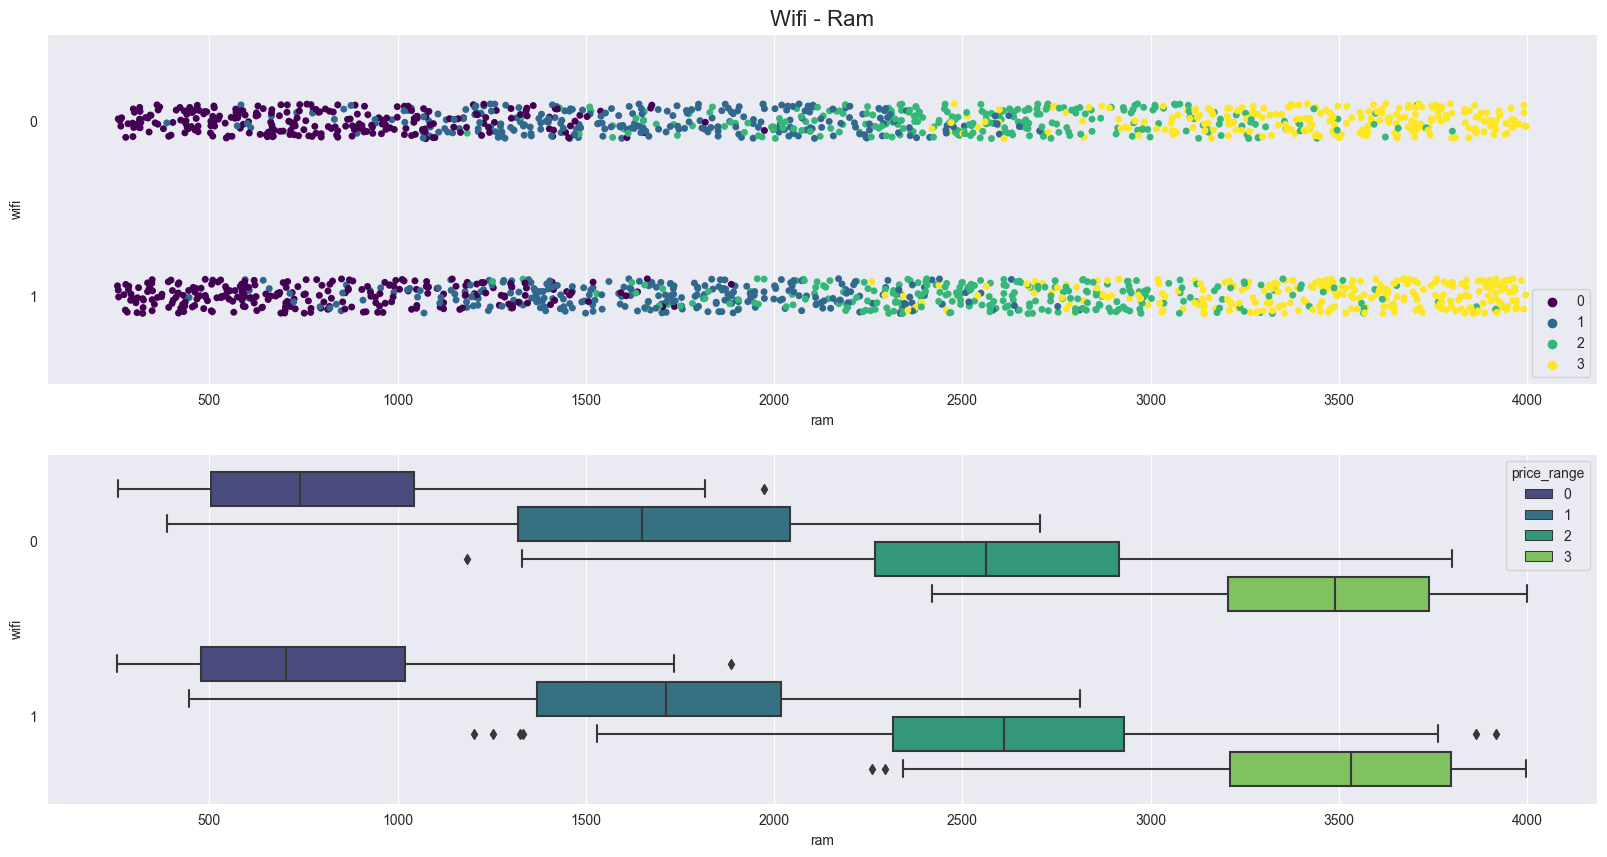

In [46]:
fig, axes = plt.subplots(2,1, figsize=(20,10))
sns.stripplot(data=Df, x='ram', palette='viridis', hue='price_range', y='wifi', orient='h', ax=axes[0])
axes[0].set_title('Wifi - Ram', fontsize='16')
axes[0].legend(loc=4)
sns.boxplot(data=Df, x='ram', palette='viridis', hue='price_range', y='wifi', orient='h', ax=axes[1])
plt.show()

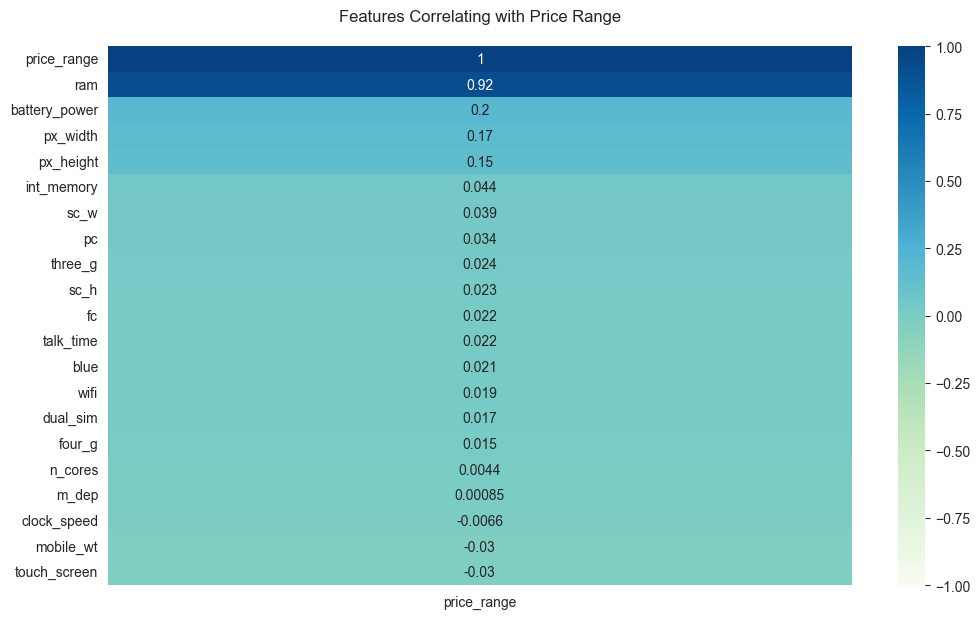

In [47]:
plt.figure (figsize = (12, 7), dpi = 100)
heatmap = sns.heatmap (Df.corr()[['price_range']].sort_values (by = 'price_range', ascending = False), vmin = -1, vmax = 1, annot = True, cmap = 'GnBu')
heatmap.set_title ('Features Correlating with Price Range', fontdict = {'fontsize':12}, pad = 18);

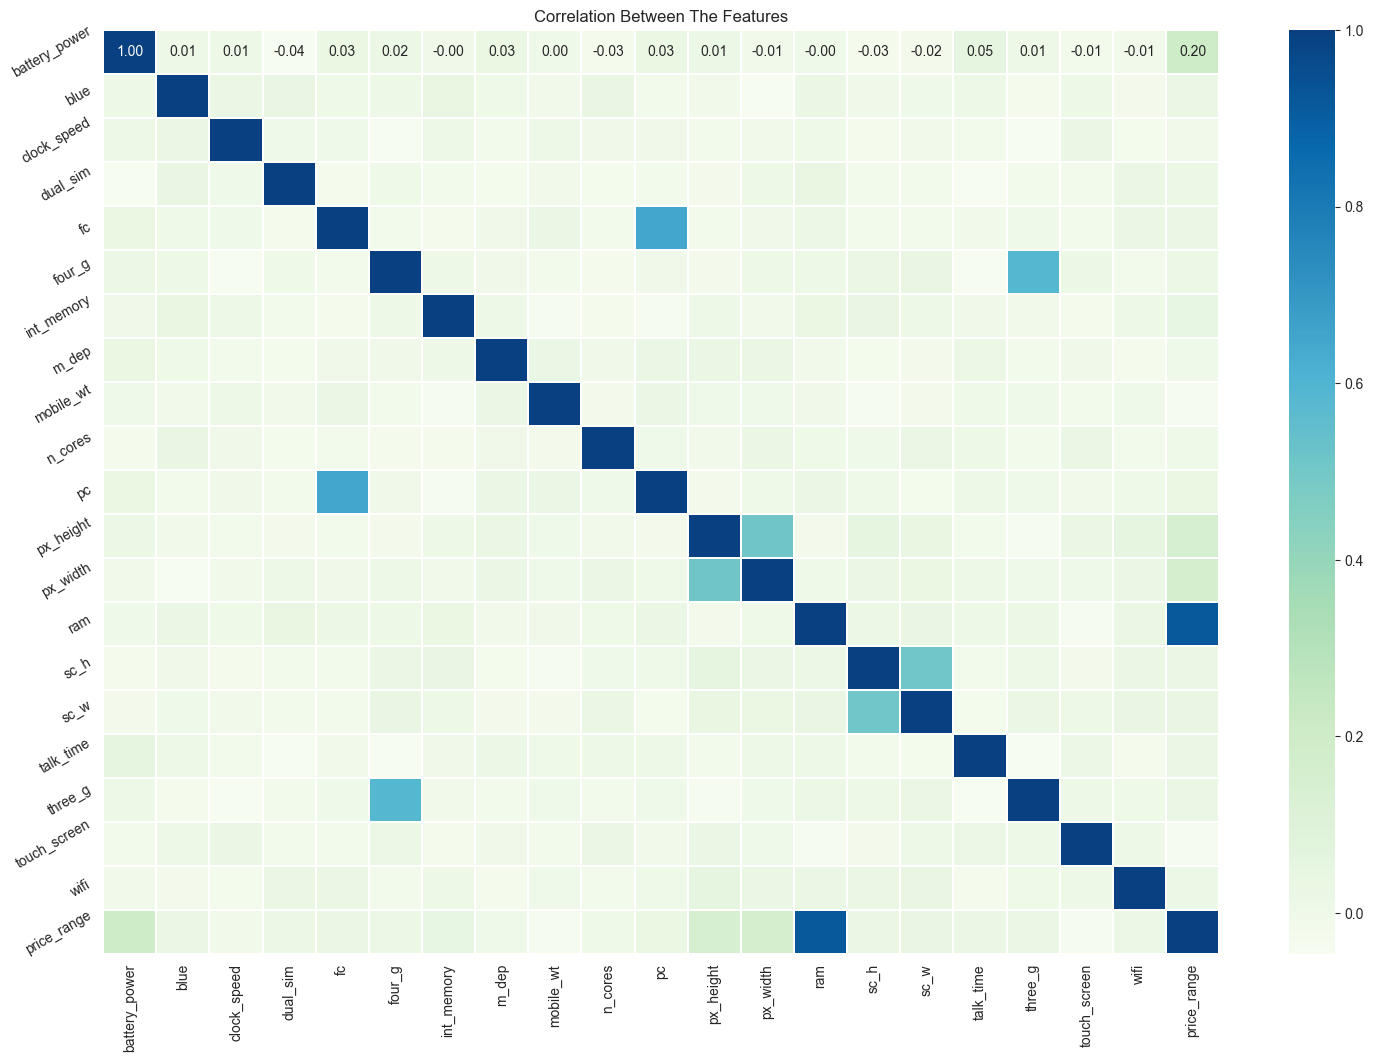

In [48]:
fig=plt.gcf()
fig.set_size_inches(18, 12)
plt.title('Correlation Between The Features')
a = sns.heatmap(Df.corr(), annot = True, cmap = 'GnBu', fmt='.2f', linewidths=0.2)
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()